In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
if not data.isnull().any().any(): 
    print('No missing data')

No missing data


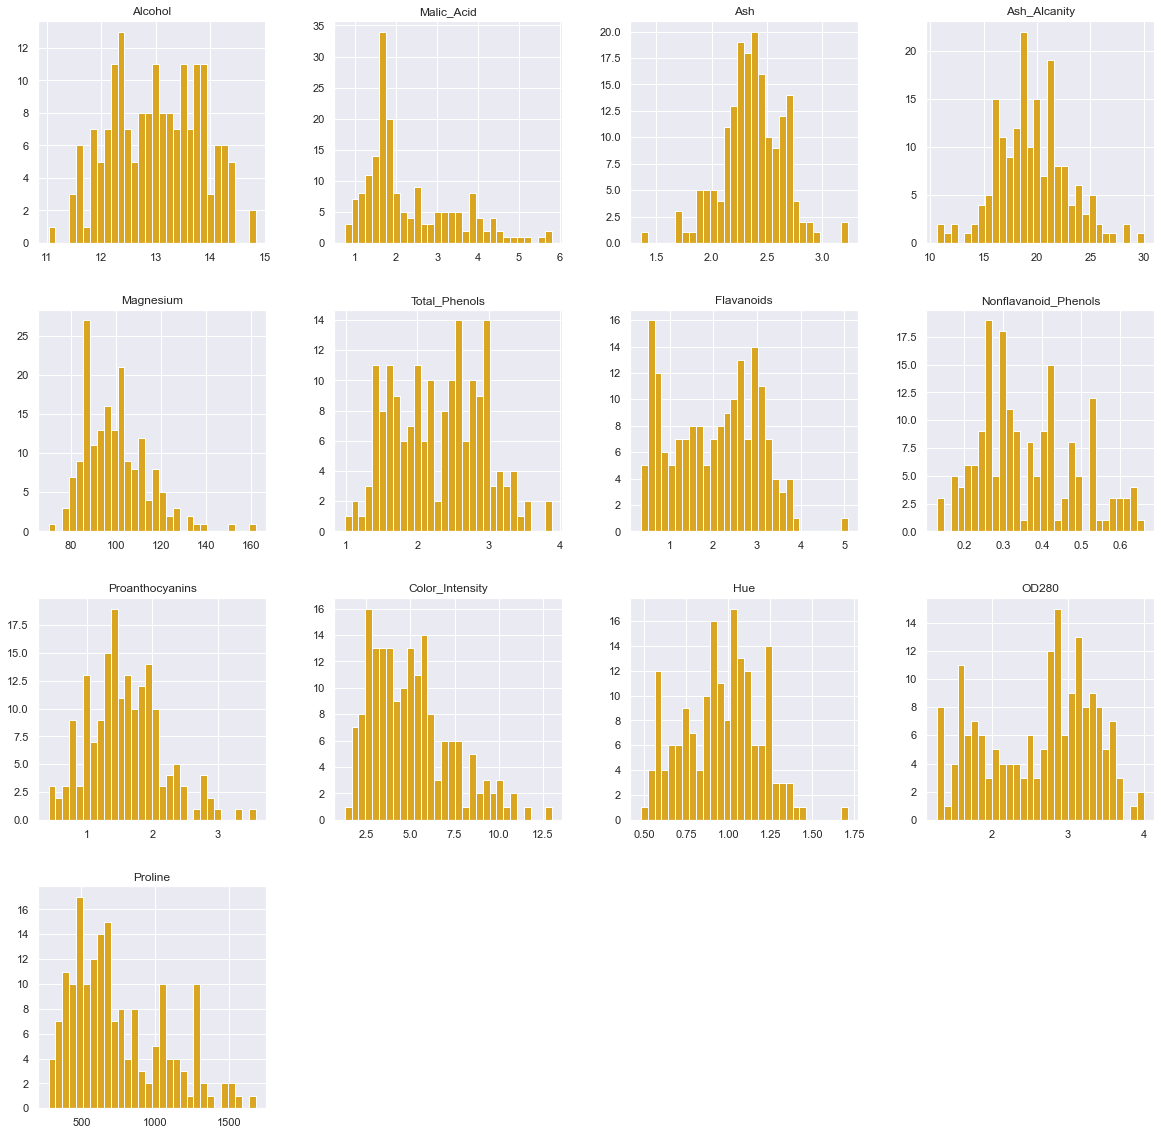

In [5]:
sns.set(style = 'darkgrid')
ax = data.hist(bins = 30, color = 'goldenrod', figsize = (20, 20))

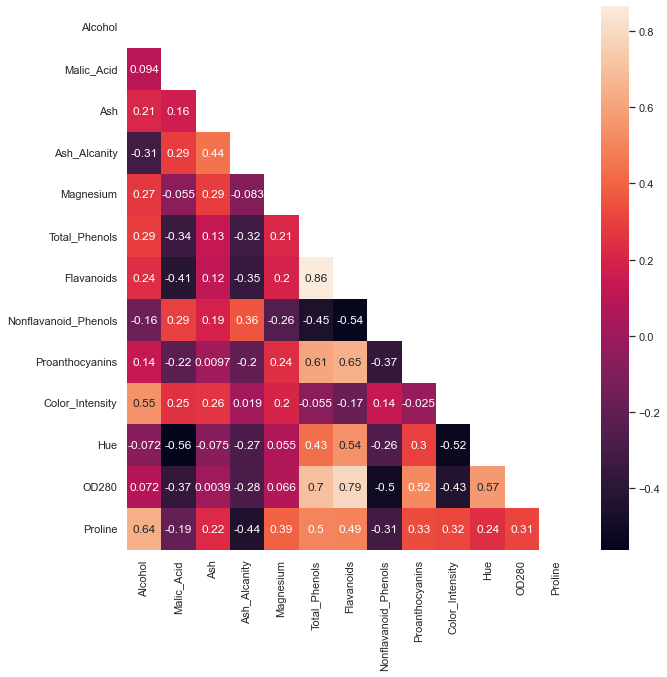

In [6]:
sns.set(style = 'whitegrid')
plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), mask = np.triu(np.ones_like(data.corr())), annot = True)
plt.show()

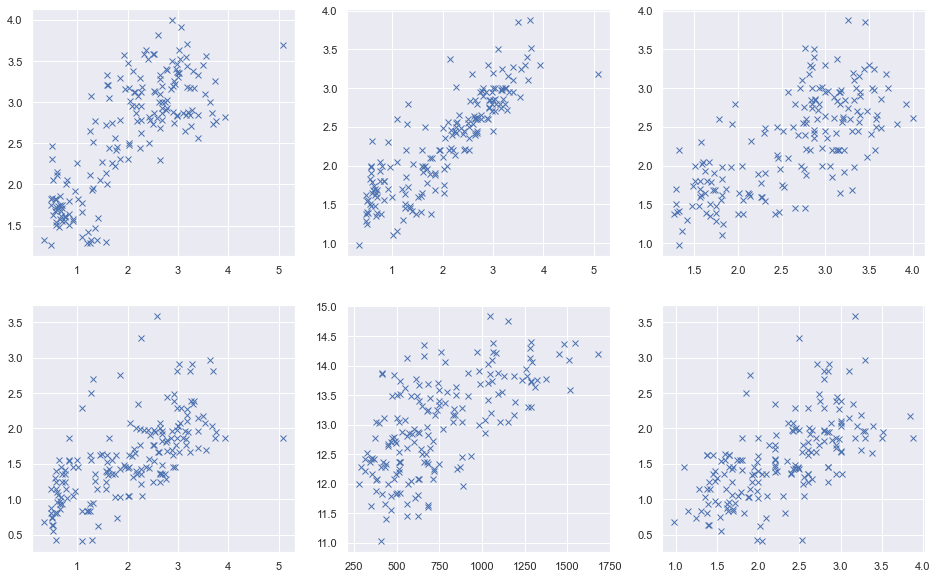

In [7]:
sns.set(style = 'darkgrid')
plt.subplots(figsize = (16, 10))
plt.subplot(2, 3, 1)
plt.plot(data['Flavanoids'], data['OD280'], 'bx')
plt.subplot(2, 3, 2)
plt.plot(data['Flavanoids'], data['Total_Phenols'], 'bx')
plt.subplot(2, 3, 3)
plt.plot(data['OD280'], data['Total_Phenols'], 'bx')
plt.subplot(2, 3, 4)
plt.plot(data['Flavanoids'], data['Proanthocyanins'], 'bx')
plt.subplot(2, 3, 5)
plt.plot(data['Proline'], data['Alcohol'], 'bx')
plt.subplot(2, 3, 6)
plt.plot(data['Total_Phenols'], data['Proanthocyanins'], 'bx')
plt.show()

In [8]:
stand_data = StandardScaler().fit_transform(data)
data = pd.DataFrame(stand_data, columns = data.columns)

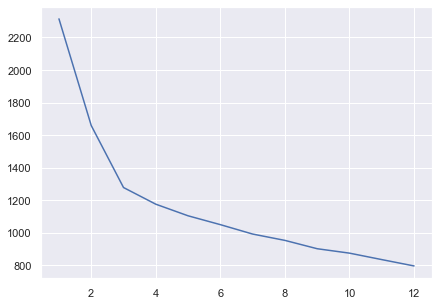

In [9]:
X = data.values
sns.set(style = 'darkgrid')
distorts = []
for i in range(1, len(data.columns)):
    model = KMeans(n_clusters = i, init = 'k-means++')
    model.fit_predict(X)
    distorts.append(model.inertia_)
plt.subplots(figsize = (7, 5))
plt.plot(range(1, len(data.columns)), distorts)
plt.show()

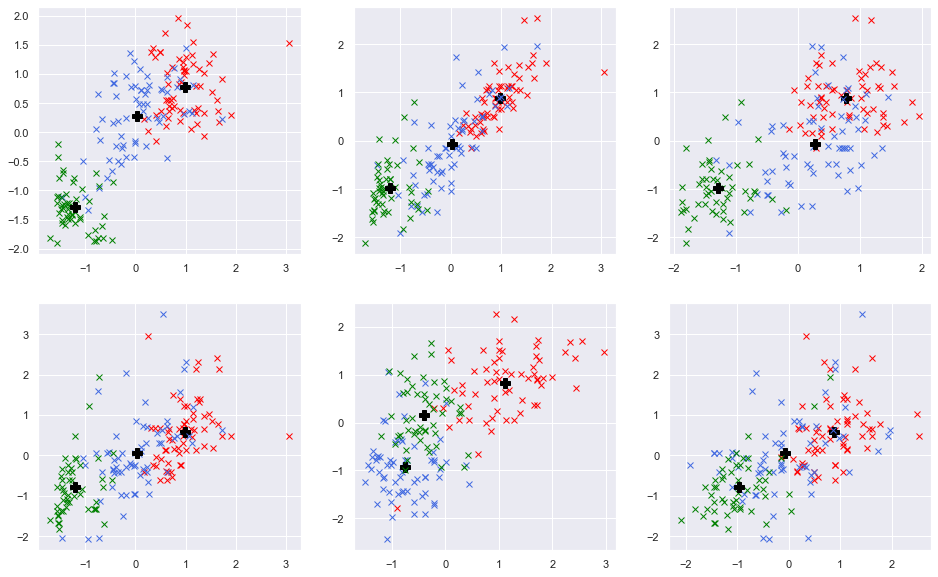

In [10]:
model = KMeans(n_clusters = 3, init = 'k-means++')
y = model.fit_predict(X)
centers = model.cluster_centers_
plt.subplots(figsize = (16, 10))
colors = ['red', 'royalblue', 'green']

plt.subplot(2, 3, 1)
for i in set(y):
    plt.plot(data['Flavanoids'][y == i], data['OD280'][y == i], 'bx', color = colors[i])
    plt.plot(centers[i][list(data.columns).index('Flavanoids')], centers[i][list(data.columns).index('OD280')], 'P', 
             color = 'black', markersize = 10)
plt.subplot(2, 3, 2)
for i in set(y):
    plt.plot(data['Flavanoids'][y == i], data['Total_Phenols'][y == i], 'bx', color = colors[i])
    plt.plot(centers[i][list(data.columns).index('Flavanoids')], centers[i][list(data.columns).index('Total_Phenols')], 'P', 
             color = 'black', markersize = 10)
plt.subplot(2, 3, 3)
for i in set(y):
    plt.plot(data['OD280'][y == i], data['Total_Phenols'][y == i], 'bx', color = colors[i])
    plt.plot(centers[i][list(data.columns).index('OD280')], centers[i][list(data.columns).index('Total_Phenols')], 'P', 
             color = 'black', markersize = 10)
plt.subplot(2, 3, 4)
for i in set(y):
    plt.plot(data['Flavanoids'][y == i], data['Proanthocyanins'][y == i], 'bx', color = colors[i])
    plt.plot(centers[i][list(data.columns).index('Flavanoids')], centers[i][list(data.columns).index('Proanthocyanins')], 
             'P', color = 'black', markersize = 10)
plt.subplot(2, 3, 5)
for i in set(y):
    plt.plot(data['Proline'][y == i], data['Alcohol'][y == i], 'bx', color = colors[i])
    plt.plot(centers[i][list(data.columns).index('Proline')], centers[i][list(data.columns).index('Alcohol')], 'P', 
             color = 'black', markersize = 10)
plt.subplot(2, 3, 6)
for i in set(y):
    plt.plot(data['Total_Phenols'][y == i], data['Proanthocyanins'][y == i], 'bx', color = colors[i])
    plt.plot(centers[i][list(data.columns).index('Total_Phenols')], centers[i][list(data.columns).index('Proanthocyanins')],
             'P', color = 'black', markersize = 10)
plt.show()